# Importing Required Modules

The following cell imports all necessary Python modules and project-specific packages used throughout this notebook, including numpy, pandas, matplotlib, scipy, and ADM1 model utilities.

In [1]:
# Import required modules
from adm1.influent import get_influent
from adm1.initial_state import get_initial_state
from adm1.initial_state import get_SS_initial_state
import importlib
import adm1.coAD as coAD
importlib.reload(coAD)
from plot_utils import *
from adm1.params import get_VSS 


# ADM1 Model Inputs

The following cell defines all input parameters required to run the ADM1 co-digestion model, including operational settings, feed characteristics, and initial states. These variables are used as arguments for ADM1 simulations throughout the notebook.

In [2]:
q_ad_init=193.3       # Initial influent flow rate [m^3/d]
density=1              # Influent density [tonne/m^3]
VS_per_TS=0.99            # Volatile solids per  total solids [kg VS/kg TS]     
TS_fraction=0.1        # Fraction of TS in influent
mixing_ratio=0.999999999   # Fraction for feed 1 / total (can be overridden per scenario)
OLR=4                    # Organic Loading Rate [kg VS/m3/d]
T_ad =  308.15 #K
T_base =  298.15 #K
T_op =  T_ad #k ##T_ad #=35 C
#influent=None              # Optional: pass custom influent dict
#initials=None              # Optional: pass custom initial state dict
recycle_ratio=0       # Fraction of recycle flow rate to influent flow rate
Batch_process=True     # If True, simulate a batch process (no influent flow)

In [3]:
influent = get_influent(mixing_ratio)
initials = get_SS_initial_state(mixing_ratio)

In [4]:
print("Influent:", influent)
print("Initial state:", initials)

Influent: {'S_su_in': 0.001, 'S_aa_in': 0.001, 'S_fa_in': 0.001, 'S_va_in': 0.001, 'S_bu_in': 0.001, 'S_pro_in': 0.001, 'S_ac_in': 0.001, 'S_h2_in': 1e-08, 'S_ch4_in': 1e-05, 'S_co2_in': 1e-05, 'S_IC_in': 0.04, 'S_IN_in': 0.0, 'S_I_in': 0.02, 'X_xc1_in': 0.0, 'X_ch1_in': 53.20999994679, 'X_pr1_in': 33.61999996638, 'X_li1_in': 26.509999973490004, 'X_xc2_in': 0.0, 'X_ch2_in': 2.0539367419107004e-07, 'X_pr2_in': 4.783852664703403e-08, 'X_li2_in': 6.759791808820026e-09, 'X_su_in': 0.0, 'X_aa_in': 0.0, 'X_fa_in': 0.0, 'X_c4_in': 0.0, 'X_pro_in': 0.0, 'X_ac_in': 0.0, 'X_h2_in': 0.0, 'X_I_in': 224.849999794173, 'S_cation_in': 0.04, 'S_anion_in': 0.02, 'S_nh3_in': 0.0}
Initial state: {'S_su': 1e-05, 'S_aa': 1e-05, 'S_fa': 1e-05, 'S_va': 1e-05, 'S_bu': 1e-05, 'S_pro': 1e-05, 'S_ac': 1e-05, 'S_h2': 1e-08, 'S_ch4': 1e-05, 'S_IC': 0.04, 'S_IN': 0.01, 'S_I': 0.02, 'X_xc1': 0.0, 'X_ch1': 53.20999994679, 'X_pr1': 6.723999993276, 'X_li1': 26.509999973490004, 'X_xc2': 0.0, 'X_ch2': 2.0539367419107004e-

In [5]:
from adm1.influent import reactor_setup


# --- Set up reactor for this scenario ---
reactor = reactor_setup(
influent,               # Influent scenario function
initials,          # Initial state scenario function
q_ad_init,                # Initial influent flow rate [m^3/d]
density,                    # Influent density [tonne/m^3]
VS_per_TS,                # Volatile solids per  total solids [kg VS/kg TS]    
TS_fraction,         # Fraction of water in influent
mixing_ratio,   # Fraction for feed 1 # feed1 / total (can be overridden per scenario)
OLR,                        # Organic Loading Rate [kg VS/m3/d]
recycle_ratio,                # Recycle ratio [m^3/d]                       
Batch_process,
VSS=None,  
V_liq=193.3,  # If Batch_process is True, set reactor liquid volume [m^3]
)
# --- Set up reactor for this scenario ---

q_in = reactor['q_in']
q_in1 = reactor['q_in1']
q_in2 = reactor['q_in2']
q_ad = reactor['q_ad']
q_out = reactor['q_out']
q_r = reactor['q_r']
VS_in = reactor['VS_in']
HRT = reactor['HRT']
V_liq = reactor['V_liq']
V_gas = reactor['V_gas']
V_ad = reactor['V_ad']
TS = reactor['TS']
VSS = reactor['VSS']
TS_fraction_initial = reactor['TS_fraction_initial']

In [6]:
print("q_in:", q_in)
print("q_in1:", q_in1)
print("q_in2:", q_in2)
print("q_ad:", q_ad)
print("q_out:", q_out)
print("q_r:", q_r)
print("VS_in:", VS_in)
print("HRT:", HRT)
print("V_liq:", V_liq)
print("V_gas:", V_gas)
print("V_ad:", V_ad)
print("TS:", TS)
print("VSS:", VSS)
print("TS_fraction_initial:", TS_fraction_initial)

q_in: 1e-10
q_in1: 9.999999990000001e-11
q_in2: 9.999999682655225e-20
q_ad: 1e-10
q_out: 1e-10
q_r: 0.0
VS_in: 49.35094479860027
HRT: 25
V_liq: 498.4943919050532
V_gas: 49.84943919050532
V_ad: 548.3438310955585
TS: 49.84943919050532
VSS: 49.35094479860027
TS_fraction_initial: 0.25788639001813407


In [ ]:
from adm1.params import calculate_CN_ratio

# Example usage:
cn_ratio = calculate_CN_ratio(influent)
print("C/N ratio:", cn_ratio["C/N ratio"])
print("Total C:", cn_ratio["total_C"])
print("Total N:", cn_ratio["total_N"])



# Running ADM1 Simulations

The following cells in this notebook demonstrate how to run the Anaerobic Digestion Model No. 1 (ADM1) using the `ADM1_coAD` function. These cells set up reactor parameters, influent and initial states, and execute the model to simulate co-digestion scenarios. Key outputs such as flow rates, organic loading rate (OLR), hydraulic retention time (HRT), total solids (TS), volatile suspended solids (VSS), biomethane yield, and pH are printed for analysis. The workflow includes:

- Running the ADM1 model for baseline and inhibition-disabled scenarios.
- Extracting and displaying simulation results for further comparison and visualization.

Refer to the code and outputs in the subsequent cells for details on model setup, execution, and result interpretation.

In [7]:
from adm1.coAD import ADM1_coAD
result = ADM1_coAD(
    q_ad_init,                       # Initial influent flow rate [m^3/d]
    density,                         # Influent density [tonne/m^3]
    VS_per_TS,                       # Volatile solids per total solids [kg VS/kg TS]     
    TS_fraction,                     # Fraction of TS in influent
    mixing_ratio,                     # Fraction for feed 1 / total (can be overridden per scenario)
    OLR,                             # Organic Loading Rate [kg VS/m3/d]
    T_ad,                            # K 
    T_base,                          # K
    T_op,                            # K
    recycle_ratio,
    V_liq=193.3,                       # Optional: pass custom reactor liquid volume [m^3]
    influent=None,                   # Optional: pass custom influent dict
    initials=initials,                   # Optional: pass custom initial state dict
    VSS=None,                        # Optional: pass custom VSS value
    param_overrides=None,            # override from default (≈0.05) to your desired value ,  # Optional: dict of parameter overrides (e.g., k_L_a, k_p, K_H_*)
    disable_inhibition=False,        # run with inhibition disabled (all I_* = 1)
    Batch_process=True
)

VS_in: 49.35094479860027
HRT: 25
V_liq: 498.4943919050532
V_gas: 49.84943919050532
V_ad: 548.3438310955585
TS: 49.84943919050532
VSS: 49.35094479860027
TS_fraction_initial: 0.25788639001813407
0.04172461752433936
0.08344923504867872
0.12517385257301808
0.16689847009735745
0.20862308762169682
0.25034770514603616
0.29207232267037553
0.3337969401947149
0.37552155771905427
0.41724617524339364
0.458970792767733
0.5006954102920723
0.5424200278164117
0.5841446453407511
0.6258692628650905
0.6675938803894298
0.7093184979137691
0.7510431154381085
0.7927677329624478
0.8344923504867873
0.8762169680111266
0.917941585535466
0.5841446453407511
0.6258692628650905
0.6675938803894298
0.7093184979137691
0.7510431154381085
0.7927677329624478
0.8344923504867873
0.8762169680111266
0.917941585535466
0.9596662030598053
1.0013908205841446
1.043115438108484
1.0848400556328235
1.1265646731571628
1.1682892906815021
1.2100139082058414
1.251738525730181
1.2934631432545203
1.3351877607788596
0.9596662030598053
1.001

In [ ]:
print(f"mixing_ratio: {mixing_ratio:.2f} [kg PPMS/kg total]")
print(f"TS_fraction_initial: {result['TS_fraction_initial']:.2f} [kg TS/kg]")
print(f"TS: {result['TS']:.2f} [tonne/d]")
print(f"VSS: {result['VSS']:.2f} [tonne/d]")
print(f"VS_in: {result['VS_in']:.2f} [tonne/d]")
print(f"q_in1: {result['q_in1']:.2f} [m^3/d]")
print(f"q_in2: {result['q_in2']:.2f} [m^3/d]")
print(f"q_in: {result['q_in']:.2f} [m^3/d]")
print(f"q_recycle: {result['q_recycle']:.2f} [m^3/d]")
print(f"q_ad: {result['q_ad']:.2f} [m^3/d]")
print(f"q_out: {result['q_out']:.2f} [m^3/d]")
print(f"OLR: {OLR:.2f} [kg VS/m^3/d]")
print(f"HRT: {result['HRT']:.2f} [d]")
print(f"V_liq: {result['V_liq']:.2f} [m^3]")
print(f"V_gas: {result['V_gas']:.2f} [m^3]")
print(f"V_ad: {result['V_ad']:.2f} [m^3]")
#print(f"X_xc1: {result['X_xc1']:.2f} [kg COD/m^3]")
#print(f"X_xc2: {result['X_xc2']:.2f} [kg COD/m^3]")
print(f"VS_out: {result['VS_out']:.2f} [tonne/d]")
print(f"VS_reduction: {result['VS_reduction']:.2f} [%]")
print(f"q_ch4: {result['q_ch4']:.2f} [m^3/d]")
print(f"biomethane_yield: {result['biomethane_yield']:.2f} [m^3 CH4/kg VS]")
print(f"cumulative_methane_yield: {result['cumulative_methane_yield']:.2f} [m^3 CH4/kg VS]")
print(f"pH (last timestep): {float(result['simulate_results']['pH'].iloc[-1]):.2f} [-]")
print(f"S_IN (last timestep): {float(result['simulate_results']['S_IN'].iloc[-1]):.2f} [-]")
print(f"S_gas_ch4 (last timestep): {float(result['simulate_results']['S_gas_ch4'].iloc[-1]):.5f} [-]")
print(f"S_ch4 (last timestep): {float(result['simulate_results']['S_ch4'].iloc[-1]):.5f} [-]")
print(f"p_gas_ch4 (last timestep): {result['p_gas_ch4']:.2f} [-]")
print(f"I_IN_lim (last timestep): {float(result['inhibition']['I_IN_lim'].iloc[-1]):.2f} [-]")


In [ ]:
print(f"I_pH_h2 (last timestep): {float(result['inhibition']['I_pH_h2'].iloc[-1]):.5f} [-]")
print(f"I_IN_lim (last timestep): {float(result['inhibition']['I_IN_lim'].iloc[-1]):.5f} [-]")
print(f"I_h2_fa (last timestep): {float(result['inhibition']['I_h2_fa'].iloc[-1]):.5f} [-]")
print(f"I_h2_c4 (last timestep): {float(result['inhibition']['I_h2_c4'].iloc[-1]):.5f} [-]")
print(f"I_h2_pro (last timestep): {float(result['inhibition']['I_h2_pro'].iloc[-1]):.5f} [-]")
print(f"I_pH_aa (last timestep): {float(result['inhibition']['I_pH_aa'].iloc[-1]):.5f} [-]")
print(f"I_pH_ac (last timestep): {float(result['inhibition']['I_pH_ac'].iloc[-1]):.5f} [-]")
print(f"I_nh3 (last timestep): {float(result['inhibition']['I_nh3'].iloc[-1]):.5f} [-]")

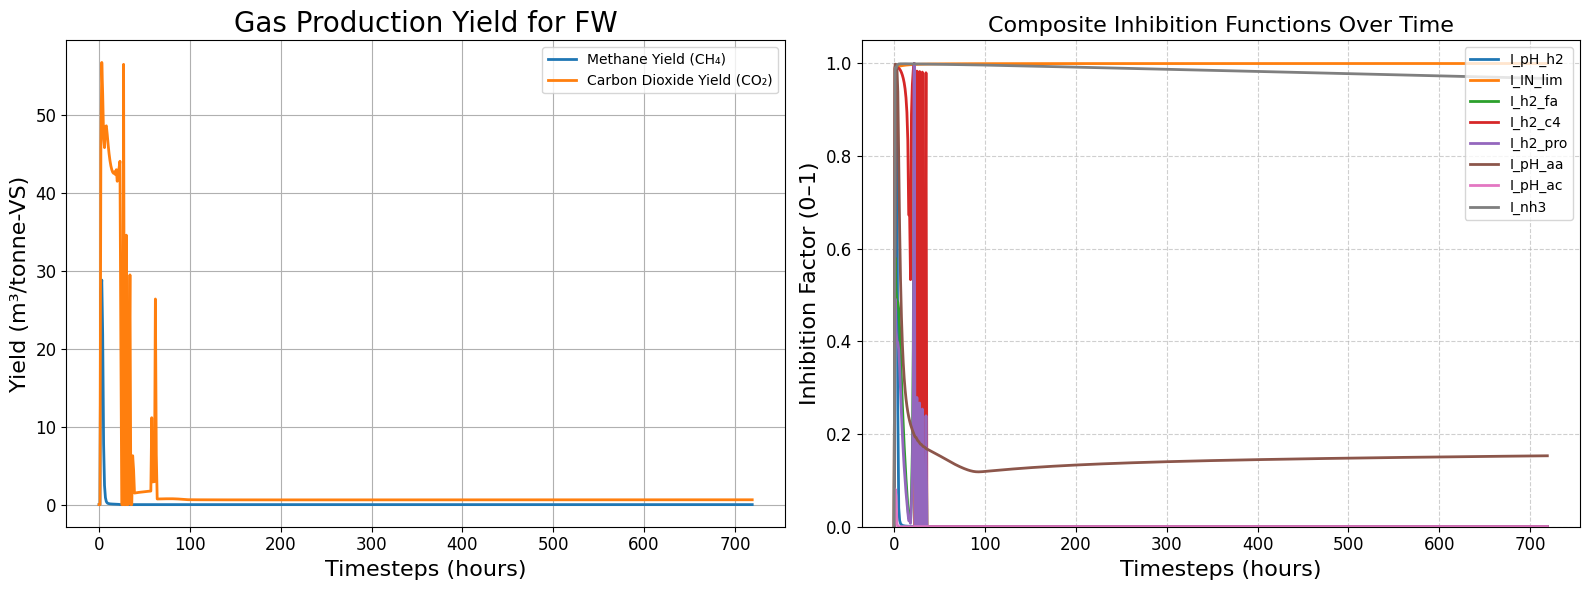

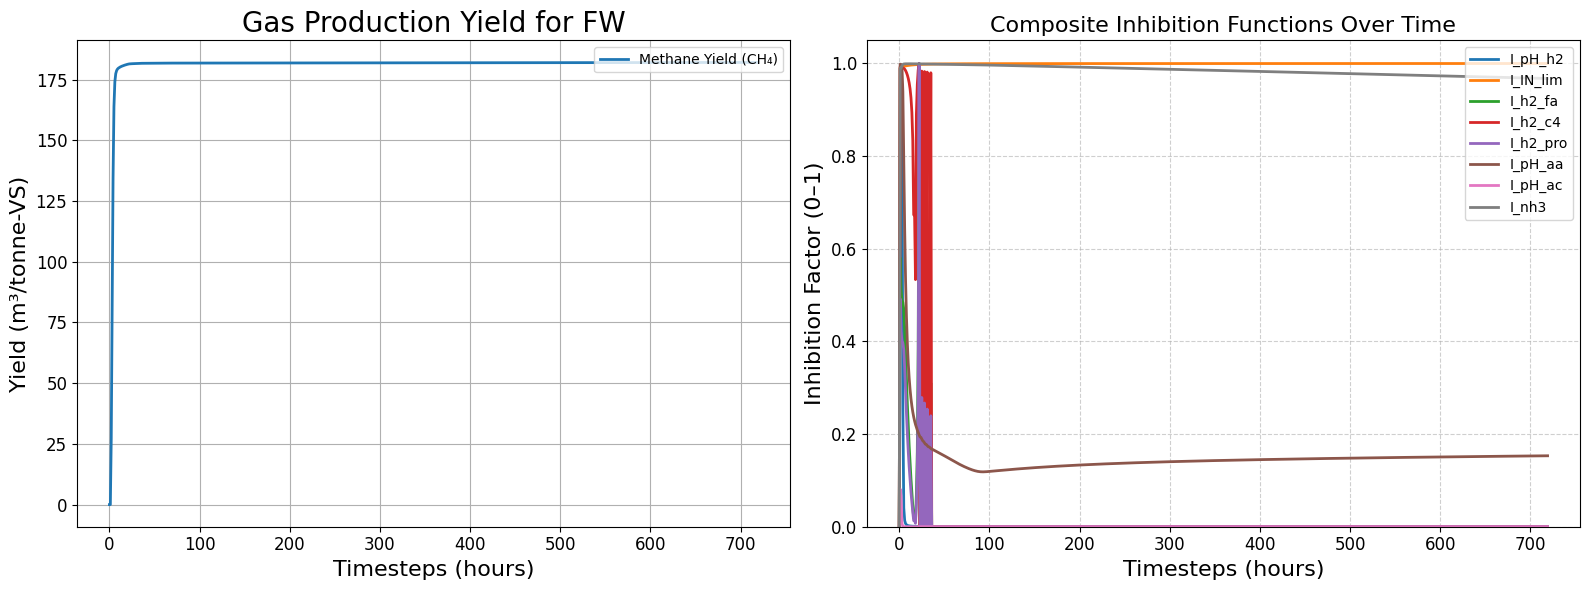

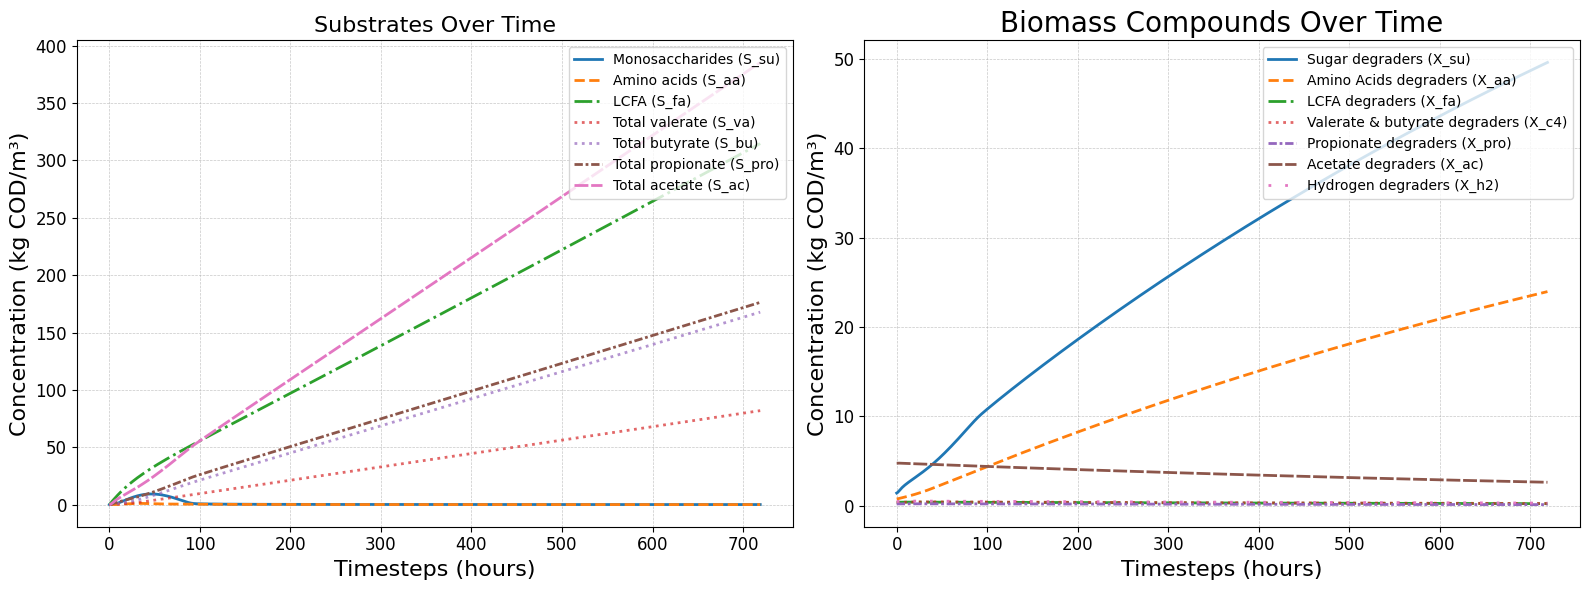

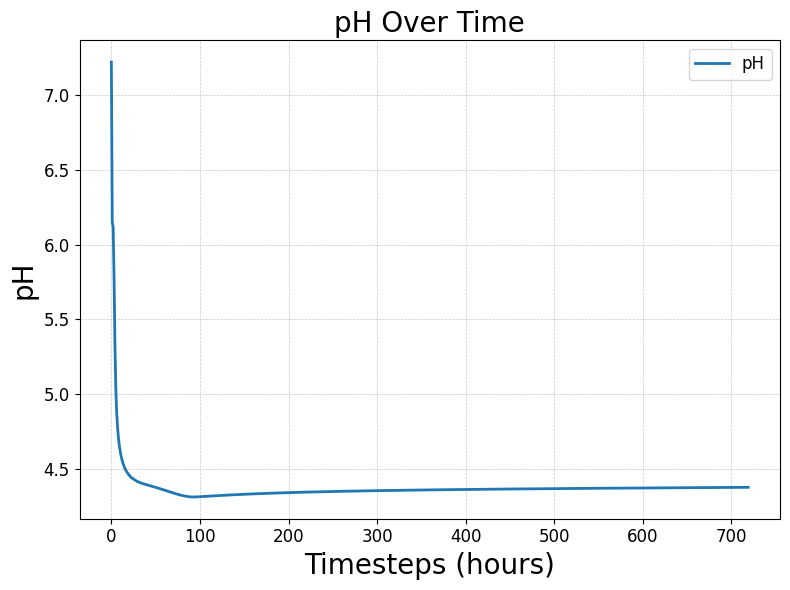

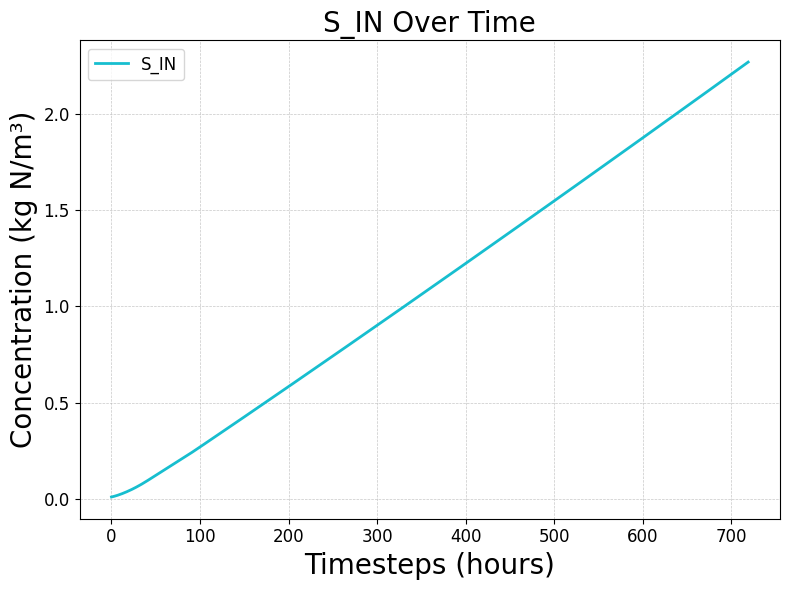

In [8]:
plot_gas_and_inhibition(result['gasflow'], result['inhibition'])
plot_cumulativegas_and_inhibition(result['gasflow'], result['inhibition'])
plot_biomass_and_substrate(result['simulate_results'])
plot_ph(result['simulate_results'])
plot_s_in(result['simulate_results'])


/var/folders/w2/9mtlwfs12sx3180rdhs7vn2r0000gn/T/ipykernel_56921/3445151642.py:11: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  cumulative_ch4 = cumtrapz(q_ch4, time, initial=0)


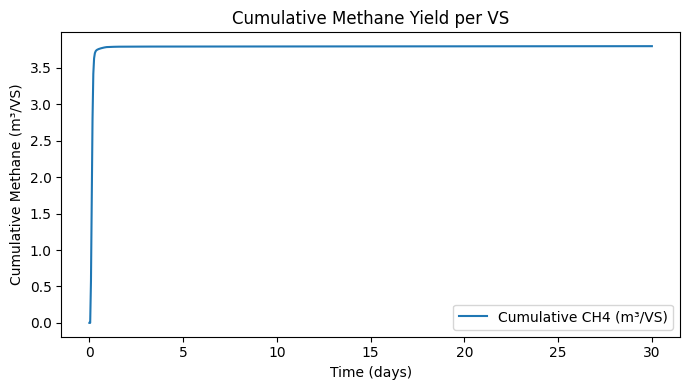

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

# Use 'u' for time and 'q_ch4' from gasflow
time = result['u']
q_ch4 = result['gasflow']['q_ch4']
VS_in = result['VS_in']  # total volatile solids input (tonne/d or as appropriate)

# Use trapezoidal integration for cumulative methane (m3)
cumulative_ch4 = cumtrapz(q_ch4, time, initial=0)

# Normalize by VS_in to get m3 CH4 per tonne VS (or per VS unit)
cumulative_ch4_per_vs = cumulative_ch4 / VS_in

plt.figure(figsize=(7,4))
plt.plot(time, cumulative_ch4_per_vs, label='Cumulative CH4 (m³/VS)')
plt.xlabel('Time (days)')
plt.ylabel('Cumulative Methane (m³/VS)')
plt.title('Cumulative Methane Yield per VS')
plt.legend()
plt.tight_layout()
plt.show()